iterative dichotomiser3 (ID3)

c 4.5

information gain : change in entropy before and after split



CART: Gini diversity index: Used to optimise the decisions on each node



conda install pydotplus
(converting png files)

Use decision trees to classify clients to see whether we could predict whether they will likely buy a new jjumper

In [10]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('WholeDataset.csv')

In [3]:
data.head()

,age,gender,No_jumpers_per_year,spent_in_the_last_week,spent,salaRy,Decision
0,23,Female,10,92,327,230576.7442,NaN
1,27,Female,10,174,538,129533.2659,NaN
2,23,Female,10,230,884,213485.8351,NaN
3,32,Female,10,188,576,156576.7442,NaN
4,33,Female,10,135,384,780576.7442,NaN


In [5]:
data.shape

(701, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 7 columns):
age                       701 non-null int64
gender                    701 non-null object
No_jumpers_per_year       701 non-null int64
spent_in_the_last_week    701 non-null int64
spent                     701 non-null int64
salaRy                    701 non-null float64
Decision                  502 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 38.4+ KB


In [7]:
data.describe()

,age,No_jumpers_per_year,spent_in_the_last_week,spent,salaRy,Decision
count,701.000000,701.000000,701.000000,701.000000,7.010000e+02,502.000000
mean,47.733238,4.748930,126.111270,419.134094,2.393763e+05,0.380478
std,22.017432,3.132733,72.473831,279.403951,2.604241e+05,0.485989
min,16.000000,0.000000,4.000000,7.000000,1.560000e+04,0.000000
25%,25.000000,2.000000,63.000000,161.000000,7.741545e+04,0.000000
50%,49.000000,5.000000,121.000000,384.000000,1.634101e+05,0.000000
75%,66.000000,7.000000,188.000000,658.000000,2.922319e+05,1.000000
max,90.000000,10.000000,250.000000,992.000000,1.820577e+06,1.000000


In [12]:
data.columns

Index(['age', 'gender', 'No_jumpers_per_year', 'spent_in_the_last_week',
       'spent', 'salaRy', 'Decision'],
      dtype='object')

In [14]:
data.rename(columns={'spent_in_the_last_week':'spent_week', 'spent':'spent_month', 'salaRy':'salary'}, inplace=True)

In [15]:
data.columns

Index(['age', 'gender', 'No_jumpers_per_year', 'spent_week', 'spent_month',
       'salary', 'Decision'],
      dtype='object')

In [16]:
data.gender.describe()

count        701
unique         6
top       female
freq         266
Name: gender, dtype: object

In [17]:
data.gender.unique()

array(['Female', 'Male', 'male', 'M', 'female', 'm'], dtype=object)

In [18]:
data['gender']= data['gender'].replace('female', 'Female')

In [19]:
data.gender.unique()

array(['Female', 'Male', 'male', 'M', 'm'], dtype=object)

In [21]:
data['gender']= data['gender'].replace(['male', 'M', 'm'], 'Male')

In [23]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [24]:
data['Decision']=data['Decision'].replace(1,'yes')
data['Decision']=data['Decision'].replace(0,'no')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 7 columns):
age                    701 non-null int64
gender                 701 non-null object
No_jumpers_per_year    701 non-null int64
spent_week             701 non-null int64
spent_month            701 non-null int64
salary                 701 non-null float64
Decision               502 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 38.4+ KB


## Split the data

In [26]:
#Removes any element with NA 
NOPredict = data.dropna()
NOPredict.head()

,age,gender,No_jumpers_per_year,spent_week,spent_month,salary,Decision
33,66,Female,10,126,409,207338.6489,yes
34,50,Female,10,61,214,226576.7442,yes
35,81,Female,10,167,632,193148.1728,yes
36,18,Female,10,150,540,138158.1395,yes
37,68,Female,10,86,332,267961.3596,yes


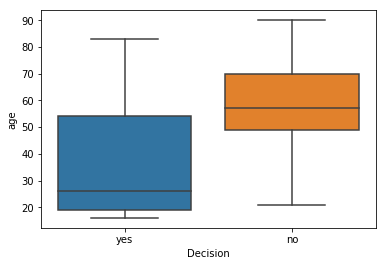

In [32]:
sns.boxplot(y='age', x='Decision', data=NOPredict)
plt.show()

In [34]:
Predict = data[pd.isnull(data['Decision'])]
Predict.head()
Predict.Decision.describe()

count     0
unique    0
Name: Decision, dtype: int64

In [36]:
data.columns

Index(['age', 'gender', 'No_jumpers_per_year', 'spent_week', 'spent_month',
       'salary', 'Decision'],
      dtype='object')

In [38]:
feature_cols = ['age', 'gender', 'No_jumpers_per_year', 'spent_week', 'spent_month',
       'salary']

In [39]:
X = NOPredict[feature_cols]
y = NOPredict.Decision

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [50]:
X_train.head()

,age,gender,No_jumpers_per_year,spent_week,spent_month,salary
556,85,Male,2,220,837,258753.21480
457,82,Female,3,82,325,105433.88700
540,24,Female,2,39,50,24174.71264
546,85,Male,2,75,231,60701.74419
516,22,Male,2,75,143,101951.74420


In [51]:
#Prefers all numerical data therefore split gender into male & female columns
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [52]:
X_train.head()

,age,No_jumpers_per_year,spent_week,spent_month,salary,gender_Female,gender_Male
556,85,2,220,837,258753.21480,0,1
457,82,3,82,325,105433.88700,1,0
540,24,2,39,50,24174.71264,1,0
546,85,2,75,231,60701.74419,0,1
516,22,2,75,143,101951.74420,0,1


## Run the model

In [53]:
# Make it a c 45 model - using entropy
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [54]:
#fit classification model with our data
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
y_predict = clf.predict(X_test)

In [56]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9047619047619048


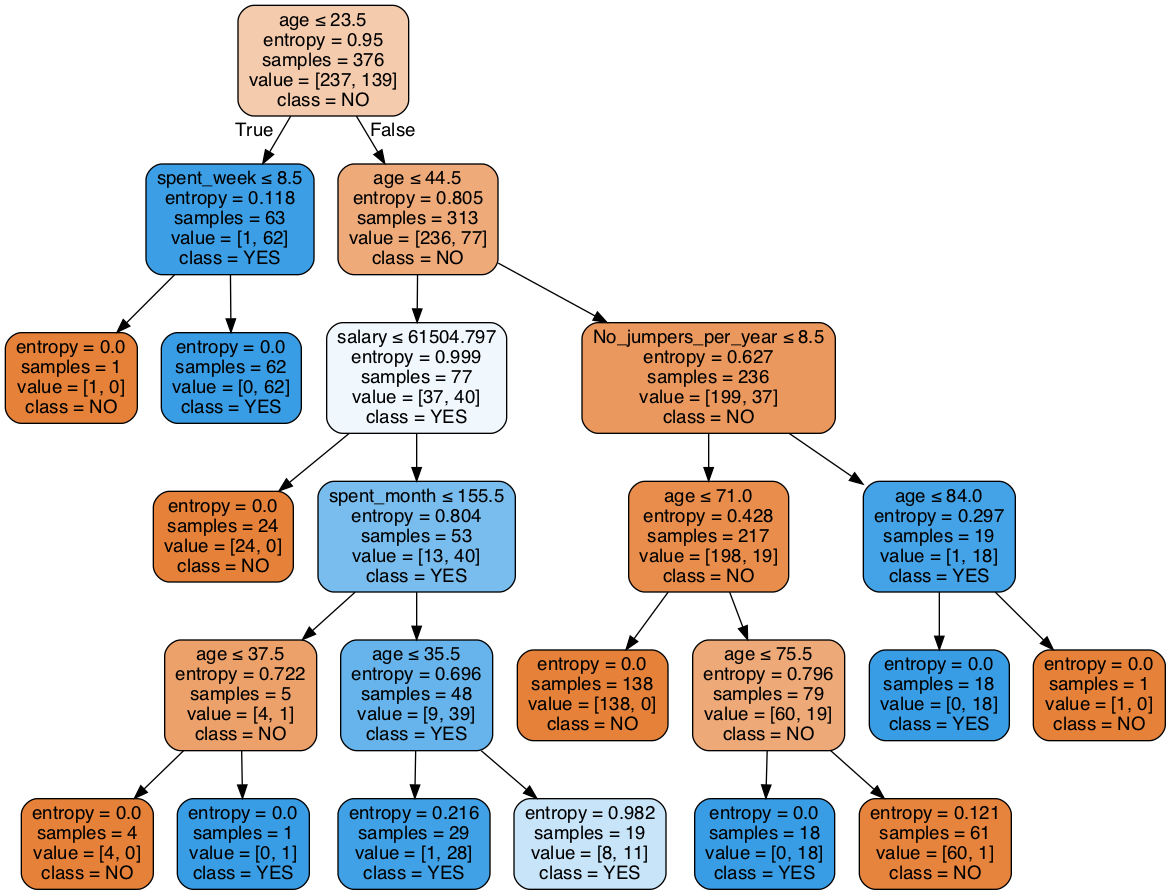

In [58]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, 
                feature_names=X_train.columns,
               class_names=['NO','YES'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())